
## FINANCIAL ECONOMETRICS
MODULE 3 | LESSON 1

---

# **RANDOM VARIABLES AND DISTRIBUTIONS**

|  |  |
|:---|:---|
|**Reading Time** | 90 minutes |
|**Prior Knowledge** |  Basic Statistics, Linear Algebra |
|**Keywords** |Random Variable,Discrete Random Variable, Continues Random Variable, Probability Distribution, Cumulative Probability Distribution, <br> Expected Value, Variance, Standard Deviation, Probability Mass Function, Probability Density Function, Bernoulli Distribution, Binomial Distribution, <br> Normal Distribution, QQ Plot, Shapiro Wilk Test, Empirical Distribution  |


---

*In the last module, we discussed many regression methods for different scenarios. We went through which regression method we should apply when the data shows certain characteristics. In this module, we are switching our focus to random variables. We are going to review what a random variable is, some of the probability distributions associated with random variables, how to investigate the relationship among random variables, and several applications for random variables. In this lesson, we are going to discuss the basics of random variables and some of their probability distributions. We will end this lesson with the introduction of empirical probability distribution. This is a method to find a probability distribution from the dataset you have without assuming what the data's distribution is.*

In [ ]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

In [ ]:
# Import dataset
data_set = pd.read_csv("M3. bond_and_stock_data.csv")

## **1. Random Variables, Discrete Random Variables, and Continuous Random Variables**

A random variable is a variable whose possible outcome comes from a specific experiment. The chance of an outcome happening from this specific experiment is determined by a probability distribution function. The set of all possible outcomes is called a **sample space**. Let's look at an example. Rolling a fair dice once and observing what face comes up on top is an experiment. There are six possible outcomes from rolling a dice: 1, 2, 3, 4, 5, and 6. The top face from rolling a dice is a random variable. Let's call this random variable $X$. The random variable $X$ can take any of the values in the sample space, i.e., {1, 2, 3, 4, 5, 6}. The probability distribution of each possible outcome for $X$ would be as follows:

$$ Pr[X=i] = 1/6, \quad i=1, 2, .., 6 $$

The above relationship between the outcome and the associated probability of the outcome forms a **probability distribution function**. The first key property of a probability distribution function is that the probability of each outcome is a number between $0$ and $1$. The second key property of a probability distribution function is that the sum of the probabilities of all possible outcomes equals $1$:

For $X$, the sum of probabilities is:

$$ \sum_{n=1}^6 Pr[X=i] = \sum_{n=1}^6 \frac{1}{6} = 1 $$

Sometimes, we would like to know the probability of outcomes over a certain range instead of a certain value. For example, we would like to know the probability that $X$ is, say less than or equal to $3$. A cumulative probability distribution of $X$ can provide this information. A **cumulative probability distribution** is a function that provides the probability of the outcome(s) of a random variable to be equal or less than a certain value, $x$. For $X$, the cumulative probability function is as follows:

 |  x  |  Pr[X <= x]  |
 | --- | --- |
 |  1  |  1/6  |
 |  2  |  2/6  |
 |  3  |  3/6  |
 |  4  |  4/6  |
 |  5  |  5/6  |
 |  6  |  6/6=1  |

How do we read the above relationship? On the left, you have all the possible outcomes. On the right, you have the cumulative probability associated with each outcome on the left. Take outcome $1$ as an example. It means the cumulative probability of getting a face that is equal to or less than $1$ is $1/6$. When the outcome is $2$, it means the cumulative probability of getting a top face that is equal to or less than $2$ is $2/6$. For outcome $3$, the cumulative probability that a top face is equal to or less than $3$ is $3/6$. 

Next, we would like to introduce two measurements for a random variable: expected value and variance.

**Expected value** is a metric to measure where the center of the random variable distribution is. Here is the formula for expected value:

$$ E(Y)= \sum_{i=1}^{n} y_{i} f(y_{i}) $$

Where $f(y_{i})$ is the probability function of a random variable $Y$ and $X$ has $y_{1}, y_{2}, ..., y_{n}$ possible outcomes

**Variance** is a metric to measure how spread out the random variable distribution is. Here is the formula for variance:

$$ V(Y) = \sigma _{Y}^{2} = E(Y - E(Y))^{2} = \sum_{i=1}^{n} (y_{i}-E(Y))^{2} f(y_{i}) = \sum_{i=1}^{n} y_{i}^{2} f(y_{i}) - [E(Y)]^{2} $$

The scale of variance is the square of the scale of the underlying random variable. In order to be able to use the spread metric directly with the random variable, we would take the square root of the variance. The square root of the variance is called **standard deviation**. The formula for standard deviation is as follows:

$$ SD(Y) = \sigma_{Y} = \sqrt{V(Y)} $$<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

**Figure 1: Expected Value and Variance Calculation for Random Variable $X$, $X$ = Top Face of Rolling a Dice**


| $$x_i$$ | $$f(x_i)$$ | $$x_i f(x_i)$$ | $$(x_i - E(X))^2$$ | $$(x_i - E(X))^2f(x_i)$$ |
| :---: | :---: | :---: | :---: | :---: |
|   1   |  1/6  |  1/6  | 6.25  | 1.04  |
|   2   |  1/6  |  1/3  | 2.25  | 0.38  |
|   3   |  1/6  |  1/2  | 0.25  | 0.04  |
|   4   |  1/6  |  2/3  | 0.25  | 0.04  |
|   5   |  1/6  |  5/6  | 2.25  | 0.38  |
|   6   |  1/6  |   1   | 6.25  | 1.04  |
|    | -------- $$E(X)$$ | -------- <br> 3.5  | -------- $$V(X)$$ | -------- <br> 2.92  |




Figure 1 shows the expected value and variance calculation steps for our dice-rolling random variable. From the above table, we can see the average outcome from rolling a dice is $3.5$. The standard deviation is $\sqrt{2.92} = 1.71$. We can use the expected value and standard deviation to form an interval and describe the probability as well. If we set an interval as follows $(3.5-1.71, 3.5+1.71) = (1.79,5.21)$, then when we roll a dice, there is a 4/6 chance that an outcome will fall into this interval $(1.79, 5.21)$.

There are two types of random variables: discrete random variables and continuous random variables.

**A discrete random variable** has a sample space whose outcome is countable. In our dice throwing example, the possible outcomes are countable: 1, 2, 3, 4, 5, and 6. Hence, it is a discrete random variable. There can be finite outcomes or infinite outcomes for a discrete random variable. In our example, we have six outcomes, so it is a finite discrete random variable. If we are looking at the possible number of defective tires in a tire production line, we can count how many tires are defective, and the number can be infinite. Hence, the number of defective tires from a production line is an infinite discrete random variable. The probability distribution function for a discrete random variable is called a **probability mass function**.

On the other hand, a **continuous random variable** has a sample space whose outcome is a real number in a range but whose outcome is not countable. For example, if we want to investigate the height of students aged eight to 15 in New York City, our sample space will be bounded by 0 and infinity (theoretically). But the outcome can be any real number between 0 and infinity if we pick one student. There will be unlimited outcomes. Hence, the height is a continuous random variable. The probability distribution function for a continuous random variable is called a **probability density function** or **density function**.

In the next sections, we are going to review two discrete random variables and their distributions: the Bernoulli random variable and binomial random variables. After looking at two discrete random variables, we will switch to a continuous random variable. We will discuss two continuous random variables: a uniform random variable and normal random variable. We will use these random variables and distributions frequently in the following modules. That's why we are going to cover them in this lesson.

## **2. Bernoulli Distribution**

Bernoulli distribution is the probability function for a Bernoulli random variable. There are many situations in real life that have Bernoulli distribution. For example, when you buy a lottery ticket, you can either win or lose. Say the probability of winning is 0.00001, and the probability of losing is 0.99999. Another popular example is to toss a coin. When you toss a coin, you either get heads or tails. If the coin is fair, there is a 50% chance that you get heads and a 50% chance that you get tails. Bernoulli distribution has only two possible outcomes from an experiment, so it is a discrete distribution. This kind of experiment is called a Bernoulli process or Bernoulli trial. In general, we would call one outcome success (S) and the other outcome failure (F). It does not mean one outcome is better than the other; it is just to differentiate between the two outcomes.

When we assign the outcome of success as 1 and the outcome of failure as 0, we come up with a special Bernoulli distribution: **indicator distribution**. Indicator distribution can be used to indicate if an event happens or not. When an event happens, the outcome is 1. When an event does not happen, the outcome is 0. Here are some properties of an indicator distribution:

Probability Mass Function:

$$ f(x)\begin{cases} 
  p  &  \text{ if } x=1 \\ 
  1-p = q  &  \text{ if } x= 0 
\end{cases} $$

Expected Value:

$$ E(X) = P $$

Variance:

$$ V(X) = P(1-p) $$

## **3. Binomial Distribution**

Sometimes, you will run a trial several times instead of once. We know one trial with the outcomes of success or failure is a Bernoulli distribution. What distribution can we use if we conduct a series of Bernoulli trials? Binomial distribution is used to describe this experiment. Let's use an example to demonstrate how binomial distribution works.

Assume we are tossing a coin three times and we want to understand the distribution of getting heads during this experiment. Since the outcome of the first trial will not affect the outcome of the second trial, we can safely say the three trials are independent of each other, which means the outcome of the first trial will not affect the outcome of the second trial. If the coin is fair, the probability of getting heads is equal to the probability of getting tails. Hence, the probability of getting either heads or tails is 0.5. Let's say random variable $X$ is the outcome of the number of times we get heads during this experiment. We can write the probability mass function for $X$ as follows:

$$ f(X)=\begin{cases} 
  \binom{3}{0} (0.5)^{3} (0.5)^{0} = 0.125  &  \text{ if } X=0 \\ 
  \binom{3}{1} (0.5)^{2} (0.5)^{1} = 0.375  &  \text{ if } X=1 \\ 
  \binom{3}{2} (0.5)^{1} (0.5)^{2} = 0.375  &  \text{ if } X=2 \\ 
  \binom{3}{3} (0.5)^{0} (0.5)^{3} = 0.125  &  \text{ if } X=3 
\end{cases} $$

Where $ \binom{3}{0}, \binom{3}{1}, \binom{3}{2}, \binom{3}{3}$ are binomial coefficients

Expected Value: $ E(X) = 0 \times 0.125 + 1 \times 0.375 + 2 \times 0.375 + 3 \times 0.125 = 1.5 $

Variance: $ V(X) = 3 \times 0.5 \times 0.5 = 0.75 $

We can generalize the above example to write the probability mass function, expected value, and variance for a binomial Distribution in which all trials are independent:

Probability Mass Function:

$$ B(X; n,p) = \binom{n}{x} p^{x} q^{n-x} $$  

where $q = 1-p$  and  $x = 0, 1, 2, ..., n $

Cumulative Distribution Function:

$$ F(x \leq m) = \sum_{i=0}^{m} \binom{n}{i} p^{i} q^{n-i} $$

Expected Value:

$$ E(X)=np $$

Variance:

$$ V(X)=npq $$

**Figure 2: Binomial Distribution with Different $p$-Values**

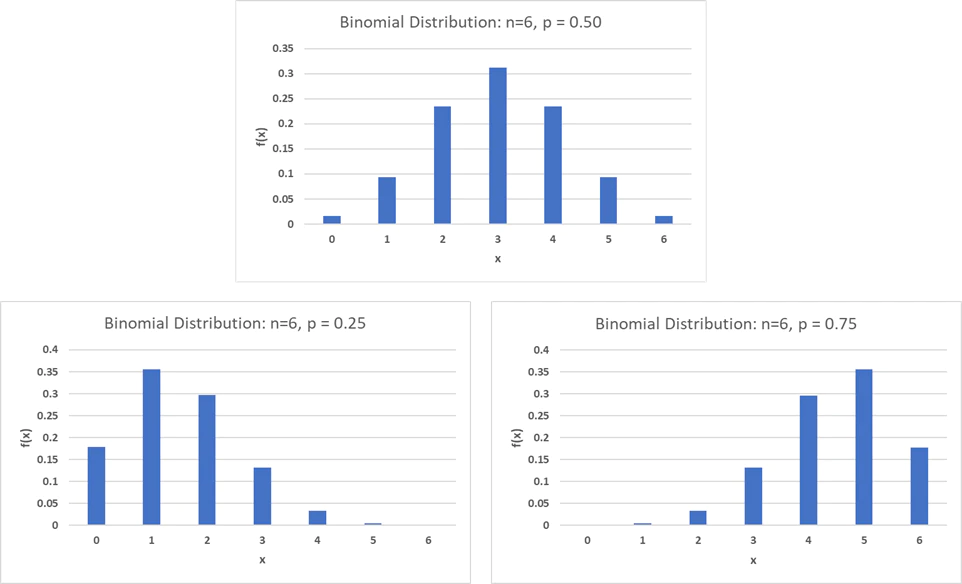

Binomial distributions would have different distribution shapes depending on the value of $p$. In Figure 2, we can see when $p = 0.5$, binomial distribution is a symmetric distribution. When $p < 0.5$, binomial distribution is a right-skewed distribution. When $p > 0.5$, binomial distribution is a left-skewed distribution.


## **4. Normal Distribution**

### **4.1 Basics of Normal Distribution**

Now we are moving to talk about continuous random variables. In this section, we will review the most popular continuous distribution in data analysis: normal random variable or normal distribution. Since we are all familiar with normal distribution from basic statistics coursework, we will only quickly review the key properties of normal distribution and discuss how to test a random variable for normality in this section.

Normal distribution is also called Gaussian distribution. For a normal random variable $X$ with the expected value $\mu_{_{X}}$ and variance $\sigma_{_{X}}^{2}$, the probability density function is as follows:

$$ f(X) = \frac{1}{\sigma_{_{X}} \sqrt{2\pi }} e^{-\frac{1}{2} \left( \frac{X-\mu_{_{X}}}{\sigma_{{X}}} \right)^{2}} $$

Where $-\infty < X < \infty $

This is also written in the following compact manner:

$$ X \sim N(\mu_{_{X}}, \sigma_{_{X}}^{2}) $$

Here are some of the properties for Normal Distribution:

#### **a. Bell-Shaped Normal Distribution Curve**

**Figure 3: Normal Distribution Curve**

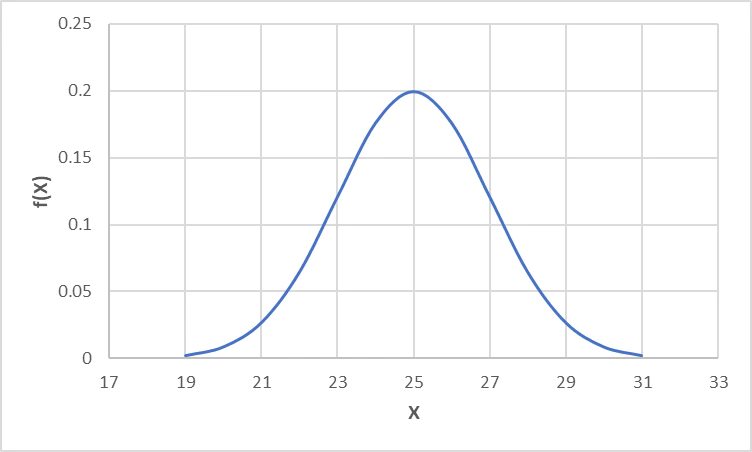

Figure 3 is the probability density curve for a normal distribution with the expected value = $25$ and standard deviation = $2$. We can see the curve is a symmetric, bell-shaped curve. The curve is centered around the expected value. It means the probability density function has a maximum at the expected value.


#### **b. Empirical Rule for Normal Distribution**

The empirical rule for normal distribution is a rule that helps us quickly know what the probability is when given a range of values from a normally distributed variable. Say $X$ is a normally distributed random variable. The empirical rule provides the following rules:

> 68% of the data from $X$ will fall into this interval:
>
> $$ (\text{expected value} - 1 \times \text{standard deviation}, \ \text{expected value} + 1 \times \text{standard deviation}) $$
>
> 95% of the data from $X$ will fall into this interval:
>
> $$ (\text{expected value} - 2 \times \text{standard deviation}, \ \text{expected value} + 2 \times \text{standard deviation}) $$
>
> 99.7% of the data from $X$ will fall into this interval:
>
> $$ (\text{expected value} - 3 \times \text{standard deviation}, \ \text{expected value} + 3 \times \text{standard deviation}) $$

In our example in Figure 3, 68% of the data points will come from the interval $(23, 27)$. 95% of the data points will come from the interval $(21, 29)$. 99.7% of the data points will come from the interval $(19, 31)$. This piece of information will be very helpful for us going forward when conducting statistical inferences.

#### **c. Standard Normal Distribution**

Standard normal distribution is a special case for normal distribution. It has the expected value = $0$ and variance = $1$. If $Z$ has standard normal distribution, its probability density function is as follows:

$$ f(Z) = \frac{1}{\sqrt{2\pi }} e^{-\frac{1}{2}Z^{2}} $$  

where $-\infty \leq Z \leq \infty $. We can write $Z$ as follows: $ Z \sim N(0,1) $

Now, standard normal distribution has a bell-shaped curve centered around $0$.

If $X$ is a normally distributed random variable, you can use the following formula to convert $X$ into a standard normal variable.

$$ \frac{X-\mu_{_{X}}}{\sigma_{_{X}}} $$

This is basically to standardize a random variable. In previous modules, there are several regression analyses that require standardizing the variable before running the model. By standardizing a variable, we can see that it will convert a normal variable into a standard normal variable with the expected value of $0$ and variance of $1$. Then, all standardized variables will have the same expected values and variances.

###  **4.2 Test of Normality**

#### **a. QQ Plot**

In order to test if a random variable is a normally distributed random variable, we usually use a graphic method as a starting point. The most popular graphic method is **QQ plot** or **quantile-quantile plot**.

**QQ plots** show if two sets of data come from the same distribution. In our case, a QQ plot will compare an observed dataset with a normal distribution to see if they match in distribution. If they do have the same distribution, then a QQ plot should show a 45-degree line pattern formed by the observed data points. 

Let's use an example to understand more about QQ plots. We randomly sampled 70 data points from a normal random variable $N (25, 2)$. We first calculated the mean and variance of the 70 data points. Then, we standardized these data points. We then ordered 70 standardized data points from smallest to largest. We also used the mean and the variance calculated from 70 data points to construct a normal distribution. Then, for each data point from smallest to largest, we used the constructed normal distribution to determine the percentile location of the data point. This percentile location on the constructed normal distribution is the $X$-axis of the QQ plot. The $Y$-axis is the original value of the data point. If the sampled data points follow normal distribution, all the ordered data points should form a straight line in the plot as shown in Figure 4.

**Figure 4: QQ Plot for Normal Distribution**


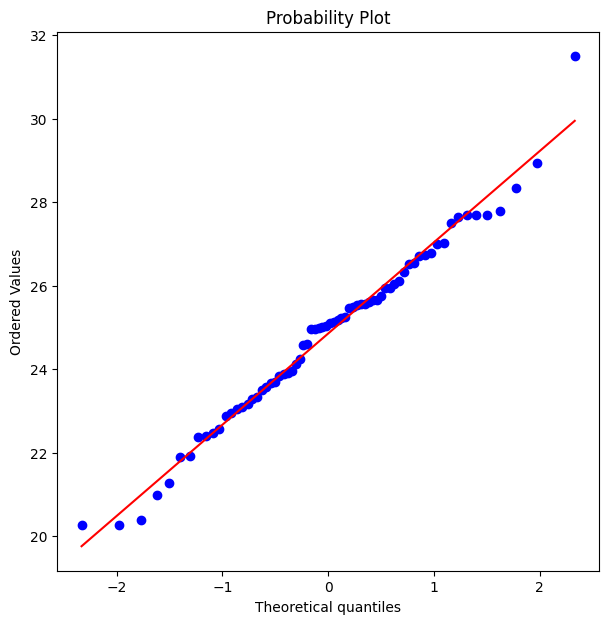

In [3]:
# QQ Plot for Normal Distribution

# Create a normal distribution
np.random.seed(12345)
y = np.random.normal(loc=25, scale=2, size=70)  # np.random.normal(mean, std, ndata)

# Plot
plt.figure(figsize=(7, 7))
stats.probplot(y, dist="norm", plot=pylab)
pylab.show()

#### **b. Shapiro–Wilk Test**

However, sometimes the graph is not very accurate. We need a formal normality test. There are several formal tests for normality. We are going to introduce one that works very well: the Shapiro–Wilk test. The Shapiro Wilk test uses the W statistic. The W statistic is the correlation between the ordered observed data points and the theoretical data points on normal distribution. If the W statistic is too small, the Shapiro–Wilk test rejects the normality hypothesis. 

**Figure 5: Shapiro–Wilk Test for 70 Data Points**


In [4]:
# Shapiro Wilk normality test
shapiro_test = stats.shapiro(y)
print(
    "Shapiro W: {0} \nShapiro p-value {1}".format(
        shapiro_test.statistic, shapiro_test.pvalue
    )
)

Shapiro W: 0.9852498693782097 
Shapiro p-value 0.5832105563259571


In figure 5, we have the Shapiro–Wilk test for our example of 70 data points. The W is 0.98 and the p-value is 0.58. The p-value is greater than 0.05 so we cannot reject that this series of 70 data points is normally distributed. Hence, they are normally distributed. 

## **5. Empirical Distribution**

In the previous sections, we assumed that we knew the theoretical distribution underlying our data. In application, many times we don't know what the theoretical distribution should be. In this section, we will use the observed data points to construct a distribution. This distribution derived from the observed dataset is called an empirical distribution function or empirical cumulative distribution function. We will go through how to construct an empirical distribution from the dataset, discuss empirical distribution's properties, and also show how to overlay theoretical distribution onto empirical distribution to check if the dataset comes from the theoretical distribution. As usual, let's use an example to understand empirical distribution.

Assume we have a data series $X$ with 10 observations as follows:  $X$: 8, 9, 9, 0, 2, 4, 5, 5, 5, 9

First, we are going to reorder $X$ data from the smallest to the largest as follows:  $X$: 0, 2, 4, 5, 5, 5, 8, 9, 9, 9

Then, for each unique outcome, we calculate the number of times it appears divided by the total number of the data series. The result is as follows: (Make sure the unique outcomes are still in ascending order, smallest to largest)

|     |     |
| --- | --- |
|  0:  |  1/10  |
|  2:  |  1/10  |
|  4:  |  1/10  |
|  5:  |  3/10  |
|  8:  |  1/10  |
|  9:  |  3/10  |

Now we can define the following empirical distribution function $F_{n}(X)$:

$$ F_{n}(X) = \begin{cases}
    0,  &  \text{ for } X< 0 \\
    \frac{1}{10},  &  \text{ for } 0\leq X< 2 \\
    \frac{1}{10} + \frac{1}{10} = \frac{2}{10},  &  \text{ for } 2\leq X< 4  \\
    \frac{1}{10} + \frac{1}{10} + \frac{1}{10} = \frac{3}{10},  &  \text{ for } 4\leq X< 5  \\
    \frac{1}{10} + \frac{1}{10} + \frac{1}{10} + \frac{3}{10} = \frac{6}{10},  &  \text{ for } 5\leq X< 8  \\
    \frac{1}{10} + \frac{1}{10} + \frac{1}{10} + \frac{3}{10} + \frac{1}{10} = \frac{7}{10},  &  \text{ for } 8\leq X< 9  \\
    \frac{1}{10} + \frac{1}{10} + \frac{1}{10} + \frac{3}{10} + \frac{1}{10} + \frac{3}{10} = \frac{10}{10},  &  \text{ for } X\geq 9 
\end{cases} $$

From the above empirical distribution function, we can see that $F_{n}(X)$ is the cumulative probability for $X$ equal to or less than certain value $C$. The empirical distribution jumps when $X$ is an observed outcome because there is a new probability value to add to the existing cumulative probability at each observed outcome. Between observed outcomes, the cumulative probability is flat because there is no observed outcome between two consecutive observed outcomes. We can also draw a step graph to demonstrate the jump of the empirical distribution at observed outcomes.

**Figure 6: Empirical Distribution Function**


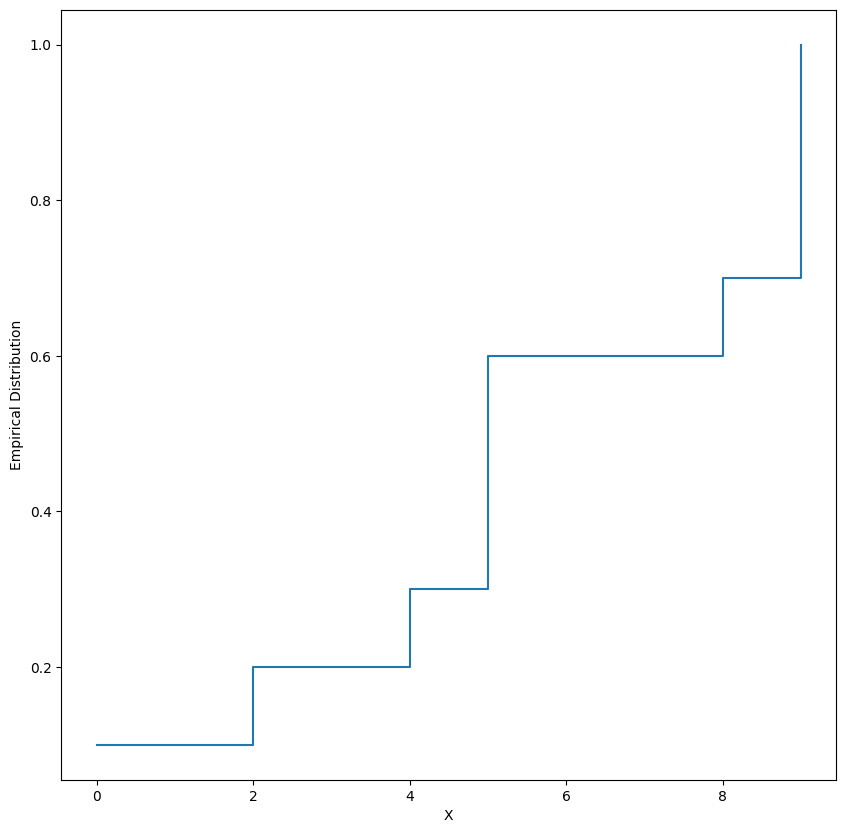

In [5]:
# Empirical Distribution function

M = [8, 9, 9, 0, 2, 4, 5, 5, 5, 9]

# Empirical Cumulative distribution function
ecd_function = ECDF(M)

# plot
plt.figure(figsize=(10, 10))
plt.plot(ecd_function.x[1:], ecd_function.y[1:], drawstyle="steps-post")
plt.xlabel("X")
plt.ylabel("Empirical Distribution")
plt.show()

From figure 6, we can see the function jumps on each observed outcome as we described before. We also see the cumulative probability is flat between two consecutive outcomes in the graph.

Let's formalize the formula for the empirical distribution function.

Assume we have a sample of n observations: $X_{1}, X_{2}, ..., X_{n}$. They are ordered from smallest to largest. They are also identical and independently distributed (i.i.d.). The empirical cumulative distribution function is:

$$ F_{n}(t) = \frac{1}{n} \sum_{j=1}^{n} 1_{(X_{j} \leq t)} $$

Where $1_{(X_{j} \leq t)}$ is an indicator function and $t$ is defined as a threshold to decide the count of $X_{1}, X_{2}, ..., X_{n}$ that are less than or equal to $t$.

We can write this indicator function as follows:

$$ 1_{(X_{j} \leq t)} = \begin{cases} 
  1  &  \text{ if } X_{j} \leq t \\ 
  0  &  \text{ if } X_{j} > t 
\end{cases} $$

The expected value of the empirical cumulative distribution function is:

$$ E_{n}(X) = \frac{1}{n} \sum_{j=1}^{n} X_{j} $$

The variance of the empirical cumulative distribution function is:

$$ V_{n}(X) = \frac{1}{n} \sum_{j=1}^{n} (X_{j} - E_{n}(X) )^{2} $$

**Figure 7: Empirical Distribution Function Overlays with Normal Cumulative Distribution Function**


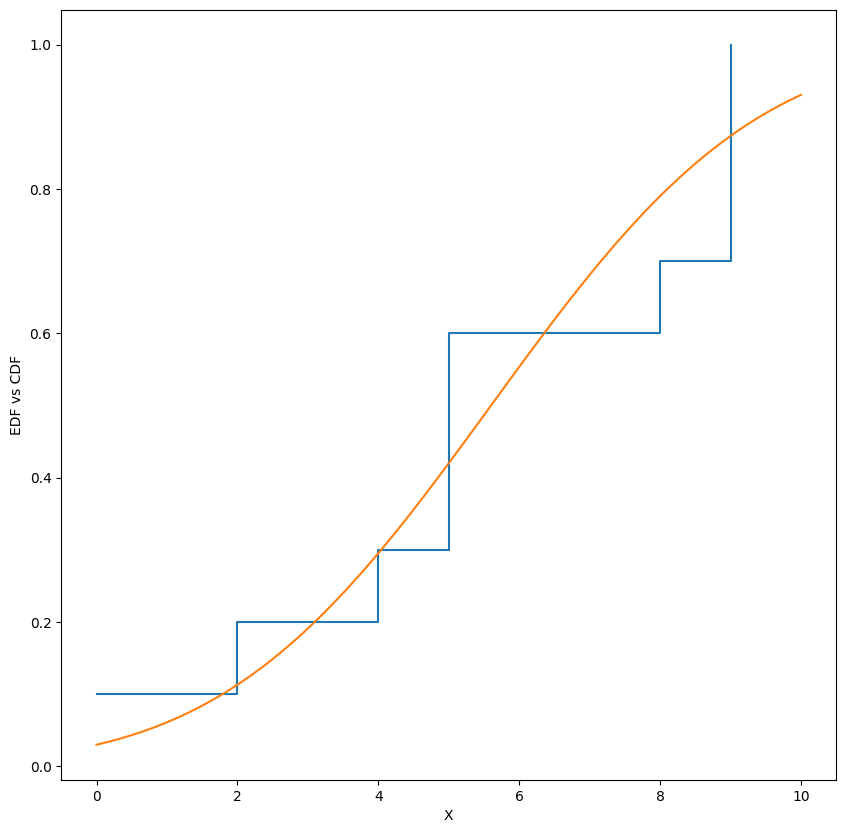

In [6]:
# EDF overlay with NCDF
plt.figure(figsize=(10, 10))

# EDF plot
plt.plot(ecd_function.x[1:], ecd_function.y[1:], drawstyle="steps-post")

# CDF plot
x = np.linspace(0, 10, 100)
y = stats.norm.cdf(x, np.mean(M), np.std(M))
plt.plot(x, y)

plt.xlabel("X")
plt.ylabel("EDF vs CDF")
plt.show()

We can overlap a theoretical distribution onto our empirical distribution plot to check if the data fits the theoretical distribution. In figure 7, a normal cumulative distribution is overlapped with the empirical distribution plot. From the plot, it seems the data fits the normal distribution. Let's do a Shapiro–Wilk test to see if the data also passes the normality test.


**Figure 8: Shapiro–Wilk Test for Observed Data**


In [7]:
# Shapiro Wilk Test for Observed Data
shapiro_testM = stats.shapiro(M)
print(
    "Shapiro W: {0} \nShapiro pvalue {1}".format(
        shapiro_testM.statistic, shapiro_testM.pvalue
    )
)

Shapiro W: 0.8973177145071203 
Shapiro pvalue 0.20467842718237345


Figure 8 shows the Shapiro–Wilk test result. The result shows the data passed the normality test. Hence, we can use normal distribution to describe our 10-observation data series.


## **6. Asset Return Distributions and Normality Tests**

Now, let's use what we learned in this lesson to test the following two popular financial market returns for normality: U.S. 10-Year Treasury Bond yield daily returns and the Dow Jones Industrial Index daily returns to check if they are normally distributed.

We first draw the QQ plot for both daily returns.

**Figure 9: Normal QQ Plot for U.S. 10-Year Treasury Bond Yield and Dow Jones Industrial Average Daily Returns**

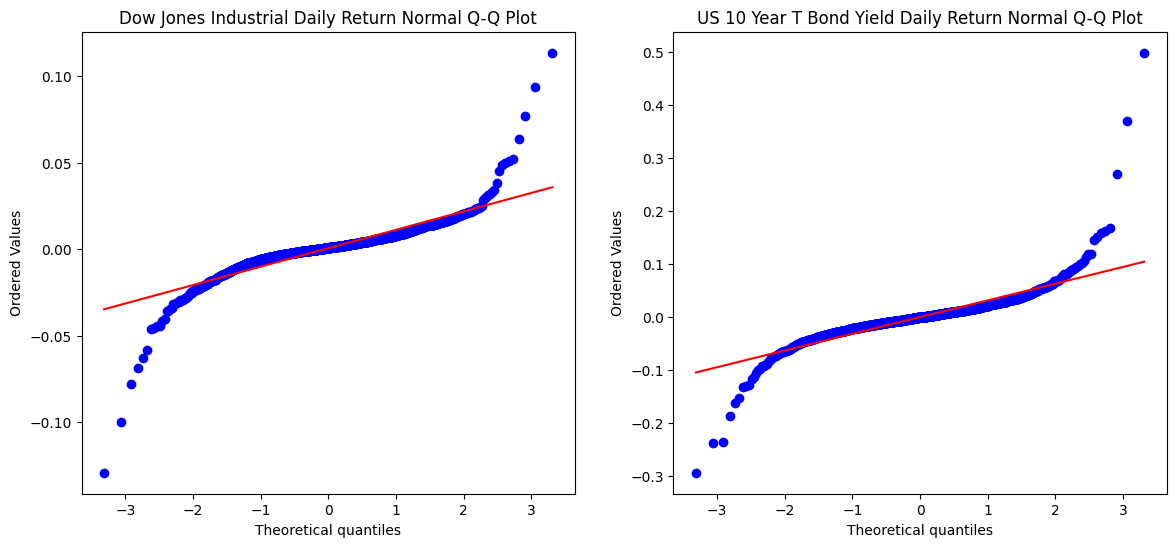

In [8]:
# Normal QQ plots
plt.figure(figsize=(14, 6))
ax1 = plt.subplot(121)
stats.probplot(data_set.DWJ, dist="norm", plot=pylab)
plt.title("Dow Jones Industrial Daily Return Normal Q-Q Plot")

ax2 = plt.subplot(122)
stats.probplot(data_set["10Y_TBY"], dist="norm", plot=pylab)
plt.title("US 10 Year T Bond Yield Daily Return Normal Q-Q Plot")
pylab.show()

From figure 9, we can see the daily returns for both assets are not normally distributed. They have a similar curvy look in the plots. These curves indicate they have more extreme values than a normal distribution. 

**Figure 10: Normality Test for U.S. 10-Year Treasury Bond Yield Daily Returns and Dow Jones Industrial Average Daily Returns**


In [9]:
# Shapiro Wilk Tests
shapiro_test10Y_TBY = stats.shapiro(data_set["10Y_TBY"])
print("10Y_TBY")
print(
    "Shapiro W: {0} \nShapiro pvalue {1}".format(
        shapiro_test10Y_TBY.statistic, shapiro_test10Y_TBY.pvalue
    )
)

shapiro_testDWJ = stats.shapiro(data_set.DWJ)
print("\nDWJ")
print(
    "Shapiro W: {0} \nShapiro pvalue {1}".format(
        shapiro_testDWJ.statistic, shapiro_testDWJ.pvalue
    )
)

10Y_TBY
Shapiro W: 0.7625240202833228 
Shapiro pvalue 4.045607123564828e-42

DWJ
Shapiro W: 0.7877278994598755 
Shapiro pvalue 1.8210701203587463e-40


From figure 10, we see that both the U.S. 10 Year Treasury Bond Yield daily returns and DJ Industrial Average daily returns did not pass the Shapiro–Wilk Test. We cannot use normal distribution to describe these two asset daily returns.


## **7. Conclusion**

In this lesson, we first reviewed random variables, including discrete and continuous random variables. Then, we went through two popular discrete distributions: Bernoulli distribution, binomial distribution. After that, we reviewed normal distribution and two methods to test normality for a random variable: the QQ plot and Shapiro–Wilk test. Lastly, we talked about empirical distribution and its properties. In the next lesson, we will talk about some distributions that are similar to normal distribution but not exactly the same.
